**Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.**

Dataset link : https://www.kaggle.com/datasets/kyanyoga/sample-sales-data


**Step 1: Import Libraries and Load the Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
print(data.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

**Step 2: Data Preprocessing**

In [4]:
features = data[['SALES', 'QUANTITYORDERED']]

In [5]:
# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Step 3: Determine the Optimal Number of Clusters using the Elbow Method**

In [6]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)

In [7]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

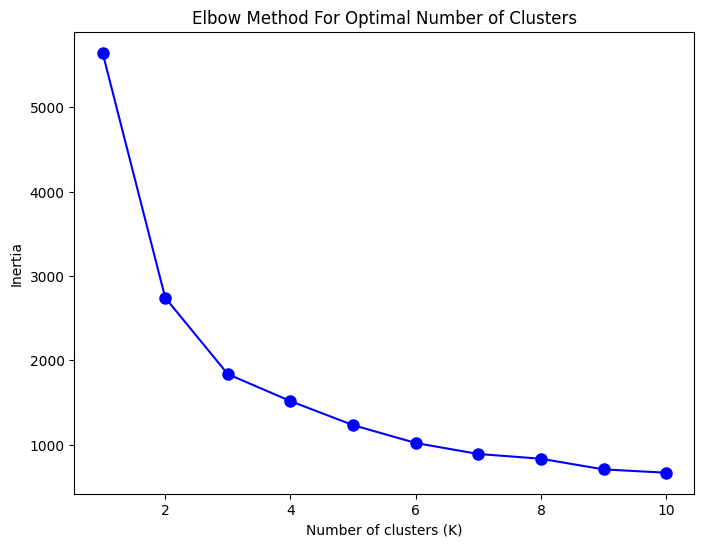

In [8]:
# Plot the elbow method results
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

**Step 4: Apply K-Means Clustering**

In [9]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 3  # Assume from the elbow method, we determine 3 clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

In [10]:
print(data[['SALES', 'QUANTITYORDERED', 'Cluster']].head())

     SALES  QUANTITYORDERED  Cluster
0  2871.00               30        0
1  2765.90               34        1
2  3884.34               41        1
3  3746.70               45        1
4  5205.27               49        2


**Step 5: Visualize the Clusters**

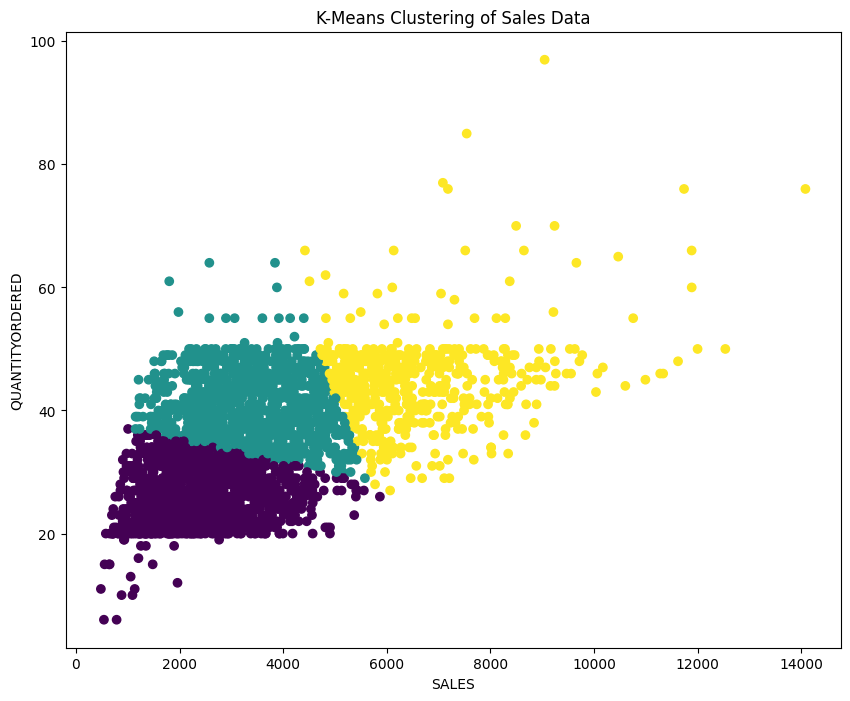

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(data['SALES'], data['QUANTITYORDERED'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Sales Data')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.show()

**Step 6: Optional - Apply Hierarchical Clustering**

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
hier_clust = AgglomerativeClustering(n_clusters=optimal_k)
data['Hier_Cluster'] = hier_clust.fit_predict(scaled_features)

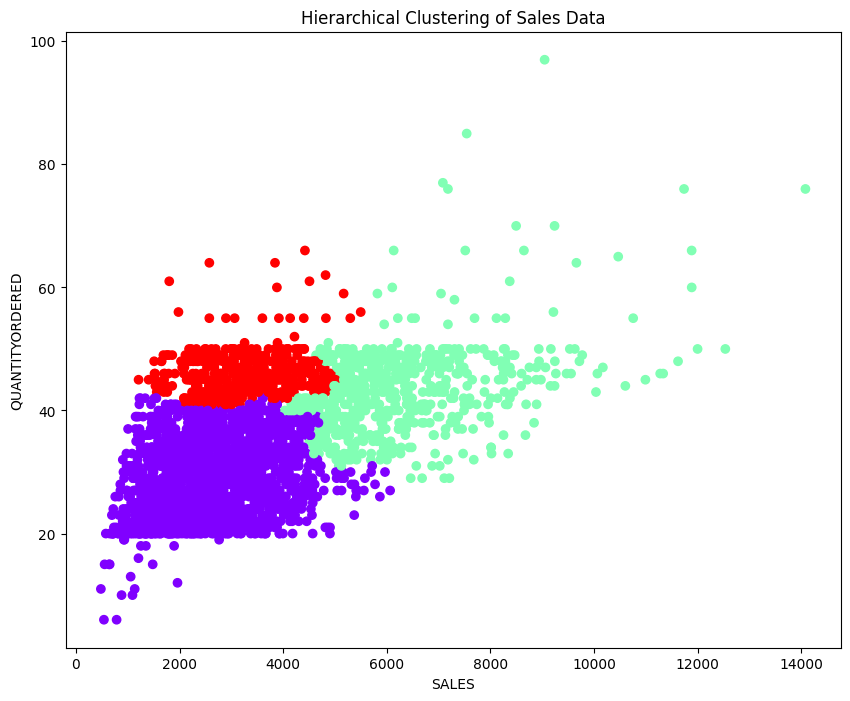

In [14]:
# Visualize Hierarchical Clustering Results
plt.figure(figsize=(10, 8))
plt.scatter(data['SALES'], data['QUANTITYORDERED'], c=data['Hier_Cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering of Sales Data')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.show()